# Comparison CUTonalá and PVlib forecast using NAM

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [37]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [38]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [39]:
#cec_module

In [40]:
#cec_inverter

In [41]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [42]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [43]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [44]:
losses = pvlib.pvsystem.pvwatts_losses(soiling=5, age=2)

In [45]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=losses, 
                 name='Name of PV system: Huerto de Cutonalá')

In [80]:
system

PVSystem:
  name: Name of PV system: Huerto de Cutonalá
  surface_tilt: 25
  surface_azimuth: 180
  module: None
  inverter: None
  albedo: 0.2
  racking_model: open_rack
  module_type: glass_polymer
  temperature_model_parameters: {'a': -3.47, 'b': -0.0594, 'deltaT': 3}

In [46]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [47]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#start_variable stand for a configurable variable for one given date
#end_variable stand for a configurable variable for one given end date
#days_before_today variable stands for an especific date before today

days_before_today = 16

start_variable = start - pd.Timedelta(days=days_before_today)
end_variable = start_variable + pd.Timedelta(days=1)

In [48]:
start_variable

Timestamp('2021-01-18 00:00:00-0600', tz='America/Mexico_City')

In [49]:
end_variable

Timestamp('2021-01-19 00:00:00-0600', tz='America/Mexico_City')

## Variables for files

In [50]:
# study_day variable stands for what is the date of comparision between real data and forecasted
# study_variable must follow this format: DD
study_day = '18'
month = 'Enero'
model_of_study = 'NAM'

cutonala_real_data_file = './Real Data Cutonalá/Enero 18-31/2021-' + study_day + '-Enero.csv'
comparision_data_to_csv_date = './comparision data/' + study_day + '-' + month + '-2021-' + model_of_study
metrics_data = './comparision data/' + study_day + '-' + month + '-2021-' + model_of_study + '-Metrics'
print(cutonala_real_data_file)
print(comparision_data_to_csv_date)
print(metrics_data)

./Real Data Cutonalá/Enero 18-31/2021-18-Enero.csv
./comparision data/18-Enero-2021-NAM
./comparision data/18-Enero-2021-NAM-Metrics


In [51]:

from pvlib.forecast import NAM

In [52]:
# Se define el modelo de pronostico
fm = NAM()

In [53]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start_variable, end_variable)

In [54]:
#pd.set_option('display.max_columns', None)
forecast_data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2021-01-18 06:00:00-06:00,8.061951,0.872511,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2021-01-18 07:00:00-06:00,6.976288,0.945215,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2021-01-18 08:00:00-06:00,5.930573,0.728208,32.351292,8.032999,31.612546,0.0,0.0,0.0,0.0
2021-01-18 09:00:00-06:00,5.131927,0.643786,243.807273,527.760652,82.891639,0.0,0.0,0.0,0.0
2021-01-18 10:00:00-06:00,4.447205,0.727953,457.606864,732.692733,99.502242,0.0,0.0,0.0,0.0
2021-01-18 11:00:00-06:00,3.880005,0.886789,627.358108,791.667023,127.828622,0.0,0.0,0.0,0.0
2021-01-18 12:00:00-06:00,3.989532,0.793951,736.774415,805.324457,155.403403,0.0,0.0,0.0,0.0
2021-01-18 13:00:00-06:00,3.853882,0.867258,777.106622,806.920208,167.617326,0.0,0.0,0.0,0.0
2021-01-18 14:00:00-06:00,5.818359,0.714286,745.280026,805.801749,157.882400,0.0,0.0,0.0,0.0
2021-01-18 15:00:00-06:00,14.410522,1.285714,643.708578,794.671679,131.463078,0.0,0.0,0.0,0.0


In [55]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [56]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [57]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [58]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2021-01-18 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2021-01-18 07:00:00-06:00,3.231174e-27,0.000000,3.231174e-27,0.000000,0.000000,3.231174e-27,3.231174e-27
2021-01-18 08:00:00-06:00,2.414633e+00,823.133198,2.281374e+00,718.390618,1638.918003,2.397273e+00,1.877159e+00
2021-01-18 09:00:00-06:00,2.625417e+01,871.728241,2.477338e+01,744.191793,18436.148161,2.605511e+01,1.936879e+01
2021-01-18 10:00:00-06:00,4.581882e+01,867.419686,4.308172e+01,723.708561,31178.606366,4.547404e+01,3.222861e+01
2021-01-18 11:00:00-06:00,6.016618e+01,860.878163,5.643489e+01,705.339878,39805.777181,5.971728e+01,4.101378e+01
2021-01-18 12:00:00-06:00,6.918423e+01,853.755463,6.472698e+01,691.318134,44746.936979,6.867230e+01,4.616779e+01
2021-01-18 13:00:00-06:00,7.245932e+01,852.044309,6.775636e+01,686.915965,46542.922864,7.192410e+01,4.805220e+01
2021-01-18 14:00:00-06:00,6.993091e+01,847.578839,6.536672e+01,684.462108,44741.044270,6.941720e+01,4.651081e+01
2021-01-18 15:00:00-06:00,6.177743e+01,831.044981,5.770279e+01,673.888467,38885.246206,6.133274e+01,4.155635e+01


In [59]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2021-01-18 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,2021-01-18 07:00:00-06:00,3.231174e-27,0.000000,3.231174e-27,0.000000,0.000000,3.231174e-27,3.231174e-27
2,2021-01-18 08:00:00-06:00,2.414633e+00,823.133198,2.281374e+00,718.390618,1638.918003,2.397273e+00,1.877159e+00
3,2021-01-18 09:00:00-06:00,2.625417e+01,871.728241,2.477338e+01,744.191793,18436.148161,2.605511e+01,1.936879e+01
4,2021-01-18 10:00:00-06:00,4.581882e+01,867.419686,4.308172e+01,723.708561,31178.606366,4.547404e+01,3.222861e+01
5,2021-01-18 11:00:00-06:00,6.016618e+01,860.878163,5.643489e+01,705.339878,39805.777181,5.971728e+01,4.101378e+01
6,2021-01-18 12:00:00-06:00,6.918423e+01,853.755463,6.472698e+01,691.318134,44746.936979,6.867230e+01,4.616779e+01
7,2021-01-18 13:00:00-06:00,7.245932e+01,852.044309,6.775636e+01,686.915965,46542.922864,7.192410e+01,4.805220e+01
8,2021-01-18 14:00:00-06:00,6.993091e+01,847.578839,6.536672e+01,684.462108,44741.044270,6.941720e+01,4.651081e+01
9,2021-01-18 15:00:00-06:00,6.177743e+01,831.044981,5.770279e+01,673.888467,38885.246206,6.133274e+01,4.155635e+01


In [60]:
droped_forecas_data = forecast_dc.drop([0,1,2,4,5,7,8,10,11,13,14,15,16,17,18])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0   2021-01-18 09:00:00-06:00
1   2021-01-18 12:00:00-06:00
2   2021-01-18 15:00:00-06:00
3   2021-01-18 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [61]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0    18436.148161
1    44746.936979
2    38885.246206
3     3087.899364
Name: p_mp, dtype: float64

## Retrieving real data

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
real_data_cut = pd.read_csv(cutonala_real_data_file)

In [63]:
real_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
0,3.600160e+11,03M172129A80,18/01/2021 07:15,group1/device4,250.05,239.91,248.35,1.37,1.31,1.24,49.09,118.34,475.45,0.24,514.87,452.45,0.21,0.03,108.34,7.43,0,0.02
1,3.600160e+11,03M172129A80,18/01/2021 07:30,group1/device4,287.00,279.85,284.95,2.12,2.38,2.20,60.02,282.45,10.33,-0.17,675.34,585.34,0.30,0.14,198.45,82.77,0,0.09
2,3.600160e+11,03M172129A80,18/01/2021 07:45,group1/device4,286.52,279.48,284.67,2.30,2.56,2.44,59.99,818.89,0.00,0.00,726.79,711.93,0.71,0.44,519.45,309.67,0,0.30
3,3.600160e+11,03M172129A80,18/01/2021 08:00,group1/device4,286.37,279.34,284.62,2.72,3.03,2.97,59.97,1575.99,-0.33,-0.44,767.15,750.93,1.35,0.74,1029.78,553.45,0,0.69
4,3.600160e+11,03M172129A80,18/01/2021 08:15,group1/device4,285.36,278.25,283.87,3.16,3.51,3.53,60.00,2164.22,0.00,-0.13,751.29,766.86,1.92,0.96,1441.99,738.11,0,1.23
5,3.600160e+11,03M172129A80,18/01/2021 08:30,group1/device4,283.95,277.22,282.54,5.32,5.65,5.83,60.04,4301.45,0.00,0.02,758.61,727.22,3.79,2.01,2879.11,1463.67,0,2.31
6,3.600160e+11,03M172129A80,18/01/2021 08:45,group1/device4,282.79,275.99,281.48,10.86,11.16,11.49,60.02,9188.11,-1.23,0.11,750.58,729.69,6.84,5.70,5138.67,4149.45,0,4.60
7,3.600160e+11,03M172129A80,18/01/2021 09:00,group1/device4,282.84,275.89,281.41,16.24,16.54,16.92,60.03,13779.89,-1.33,0.00,740.04,710.12,9.72,9.53,7197.33,6763.44,0,8.05
8,3.600160e+11,03M172129A80,18/01/2021 09:15,group1/device4,280.44,273.43,279.11,19.53,19.79,20.22,59.98,16418.78,0.89,-0.20,726.64,695.49,11.78,11.63,8563.78,8089.22,0,12.15
9,3.600160e+11,03M172129A80,18/01/2021 09:30,group1/device4,280.80,273.51,279.41,22.32,22.42,23.07,60.01,18745.00,-3.23,-0.07,715.49,684.85,13.66,13.54,9773.56,9275.22,0,16.84


In [66]:
droped_data_cut = real_data_cut.drop([0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47])

In [67]:
droped_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
7,3.600160e+11,03M172129A80,18/01/2021 09:00,group1/device4,282.84,275.89,281.41,16.24,16.54,16.92,60.03,13779.89,-1.33,0.00,740.04,710.12,9.72,9.53,7197.33,6763.44,0,8.05
19,3.600160e+11,03M172129A80,18/01/2021 12:00,group1/device4,279.96,272.65,278.94,39.19,39.36,40.02,59.99,32794.67,-5.21,0.09,646.83,619.32,26.50,26.48,17147.66,16411.11,0,86.09
31,3.600160e+11,03M172129A80,18/01/2021 15:00,group1/device4,280.64,272.67,278.91,29.07,29.17,29.84,60.02,24352.89,2.67,0.38,670.28,657.99,18.82,18.72,12575.89,12286.11,0,160.89
43,3.600160e+11,03M172129A80,18/01/2021 18:00,group1/device4,284.28,274.11,281.23,2.17,2.46,2.31,60.00,609.77,0.00,-0.47,670.84,645.87,0.58,0.37,384.55,234.67,0,183.29


In [68]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0    13779.89
1    32794.67
2    24352.89
3      609.77
Name: Pac(W), dtype: float64

In [69]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2021-01-18 09:00:00-06:00,13779.89,18436.148161
1,2021-01-18 12:00:00-06:00,32794.67,44746.936979
2,2021-01-18 15:00:00-06:00,24352.89,38885.246206
3,2021-01-18 18:00:00-06:00,609.77,3087.899364


In [70]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2021-01-18 09:00:00-06:00,13779.89,18436.148161
2021-01-18 12:00:00-06:00,32794.67,44746.936979
2021-01-18 15:00:00-06:00,24352.89,38885.246206
2021-01-18 18:00:00-06:00,609.77,3087.899364


In [71]:
comparision_to_csv = comparision.to_csv(comparision_data_to_csv_date, index=False)

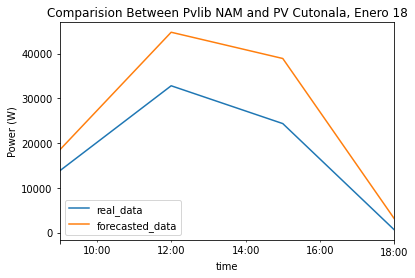

In [72]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib %s and PV Cutonala, %s %s' %(model_of_study, month, study_day));

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [73]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [74]:
real = comparision['real_data']
real

time
2021-01-18 09:00:00-06:00    13779.89
2021-01-18 12:00:00-06:00    32794.67
2021-01-18 15:00:00-06:00    24352.89
2021-01-18 18:00:00-06:00      609.77
Name: real_data, dtype: float64

In [75]:
forecasted = comparision['forecasted_data']
forecasted

time
2021-01-18 09:00:00-06:00    18436.148161
2021-01-18 12:00:00-06:00    44746.936979
2021-01-18 15:00:00-06:00    38885.246206
2021-01-18 18:00:00-06:00     3087.899364
Name: forecasted_data, dtype: float64

In [76]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:95466982.0117612
RMSE:9770.720649561177
MSLE:0.7568562641001124
RMSLE:0.8699748640622397
MAE:8404.752677536502


In [77]:
MSE = mean_squared_error(forecasted, real)
RMSE = np.sqrt(mean_squared_error(forecasted, real))
MSLE = mean_squared_log_error(forecasted, real)
RMSLE = np.sqrt(mean_squared_log_error(forecasted, real))
MAE = mean_absolute_error(forecasted, real)

In [78]:
metrics_obj = {'MSE': [MSE], 'RMSE':[RMSE], 'MSLE':[MSLE], 'RMSLE':[RMSLE], 'MAE':[MAE]}
metrics_df = pd.DataFrame(metrics_obj)
metrics_df

,MSE,RMSE,MSLE,RMSLE,MAE
0,9.546698e+07,9770.72065,0.756856,0.869975,8404.752678


In [79]:
metrics_df.to_csv(metrics_data, index=False)